# CSE428: Coding Assignment-2

In [ ]:
NAME = "Hamim Ibne Nasim"
ID = "20301443"
COLLABORATORS_ID = ["", ""]

This assignment contains 4 tasks (3 guided, 1 unguided). Complete the notebook with proper codes for the lines with `# TO-BE-COMPLETED` tag, or by *uncommenting* a partially written codes where necessary.

Background: We larned in class that linear spatial filtering is basically a signal correlation opration between an image and a filter kernel. To filter an ```image``` with a ```kernel``` all we need to do is call the ```signal.correlate``` function from the ```scipy``` library.

```
filtered_image = signal.correlate(image, kernel, mode='same', method='auto')
```
Here, ```mode="same"``` takes care of the image padding under the hood; making the filtered image the *same shape* as the input image, while ```mode="valid"``` *shrinks the filtered image*. The ```method='direct'``` implements the correlation from the definition of signal correlation:

> $g(x, y)=\sum_{s,t}{w(s, t)}f(x+s, y+t)$

whereas ```method='fft'``` uses a frequency domain implementation. The ```method='auto'``` chooses the faster implementation automatically. <br>
(Always use ```method='auto'``` while using the correlation function, unless you want to see how fast/slow a method is.)




We use the following code stucture to measure the excecution time of some python code:

```
import time

start_time = time.clock()

# some python code

print("Time elapsed: ", time.clock() - start_time, "seconds")
```


## **Task 0: The Imports** <br>
### Import the necessary libraries and define the helper functions. You can use the helper functions from the coding tutorials, or you can even use your own version of helper functions. <br>


In [ ]:
# Import libraries
from skimage.io import imread
from skimage import io,data, img_as_float
from skimage.color import rgb2gray

from skimage.util import random_noise

import numpy as np

from scipy import signal

import matplotlib.pyplot as plt

In [ ]:
# Define helper functions

 # TO-BE-COMPLETED
 # TO-BE-COMPLETED
 # TO-BE-COMPLETED ....

## **Task 1: Correlation Vs. Convolution** <br>
### Comparing the correlation and convolution operation for different kernels<br>


AxesImage(size=(512, 512))


(512, 512)

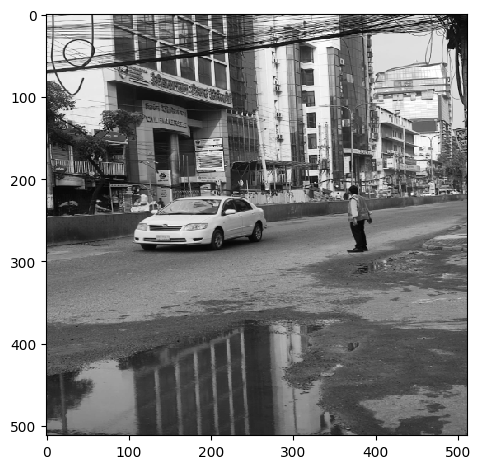

In [ ]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.
image =imread('car.png') # TO-BE-COMPLETED
image=image[:,:,0]
print(io.imshow(image))
image.shape

[[0. 1. 2. ... 2. 1. 0.]
 [1. 2. 3. ... 3. 2. 1.]
 [2. 3. 4. ... 4. 3. 2.]
 ...
 [2. 3. 4. ... 4. 3. 2.]
 [1. 2. 3. ... 3. 2. 1.]
 [0. 1. 2. ... 2. 1. 0.]]


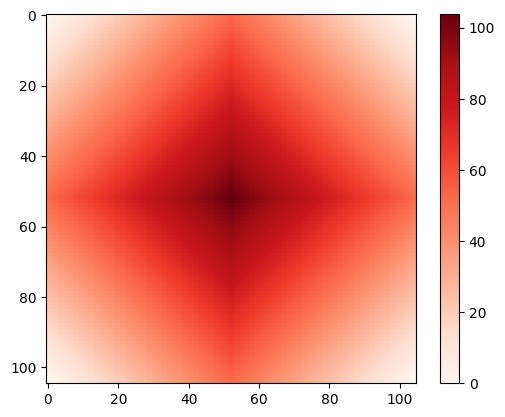

Kernel shape:  (105, 105)


In [ ]:
# Define any symmetric kernel of size (105, 105)
def make_kernel1(size):
    z = np.ones((size, size))
    for i in range((size // 2) + 1):
        for j in range((size // 2) + 1):
            val=i+j
            z[i,j] = val
            z[abs(i-(size-1)),j] =val
            z[i,abs(j-(size-1))] =val
            z[abs(i-(size-1)),abs(j-(size-1))]= val
    return z
kernel_symmetric = make_kernel1(105)# TO-BE-COMPLETED
print(kernel_symmetric)
plt.imshow(kernel_symmetric, interpolation='none', cmap="Reds")
plt.colorbar()
plt.show()
print("Kernel shape: ", kernel_symmetric.shape)

[[0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 1.0000e+00 2.0000e+00 ... 1.0200e+02 1.0300e+02 1.0400e+02]
 [0.0000e+00 2.0000e+00 4.0000e+00 ... 2.0400e+02 2.0600e+02 2.0800e+02]
 ...
 [0.0000e+00 1.0200e+02 2.0400e+02 ... 1.0404e+04 1.0506e+04 1.0608e+04]
 [0.0000e+00 1.0300e+02 2.0600e+02 ... 1.0506e+04 1.0609e+04 1.0712e+04]
 [0.0000e+00 1.0400e+02 2.0800e+02 ... 1.0608e+04 1.0712e+04 1.0816e+04]]


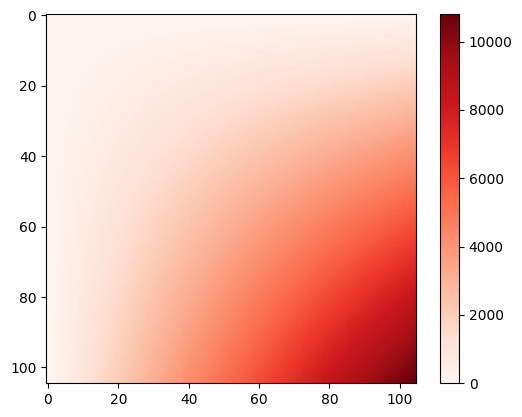

Kernel shape:  (105, 105)


In [ ]:
# Define any asymmetric kernel of size (105, 105)

def make_kernel(size):
  z=np.ones((size, size))
  for i in range(size):
    for j in range(size):
      z[i,j]=i*j
  return z
kernel=make_kernel(105)
kernel_asymmetric = kernel

print(kernel_asymmetric)
# plt.imshow(kernel_symmetric, interpolation='none', cmap="Reds")
# plt.colorbar()
# plt.show()
# print("Kernel shape: ", kernel.shape)

plt.imshow(kernel_asymmetric, interpolation='none', cmap="Reds")
plt.colorbar()
plt.show()
print("Kernel shape: ", kernel.shape)
# TO-BE-COMPLETED

In [ ]:
# Filter the image with the symmetric kernel using the correlation function

filtered_image_symmetric1 = signal.correlate(image, kernel_symmetric, mode='valid', method='auto') # TO-BE-COMPLETED

filtered_image_symmetric2 =  signal.convolve(image, kernel_symmetric, mode='valid', method='auto') # TO-BE-COMPLETED

filtered_image_asymmetric1 = signal.correlate(image, kernel_asymmetric, mode='valid', method='auto') # TO-BE-COMPLETED

filtered_image_asymmetric2 =signal.convolve(image, kernel_asymmetric, mode='valid', method='auto') # TO-BE-COMPLETED

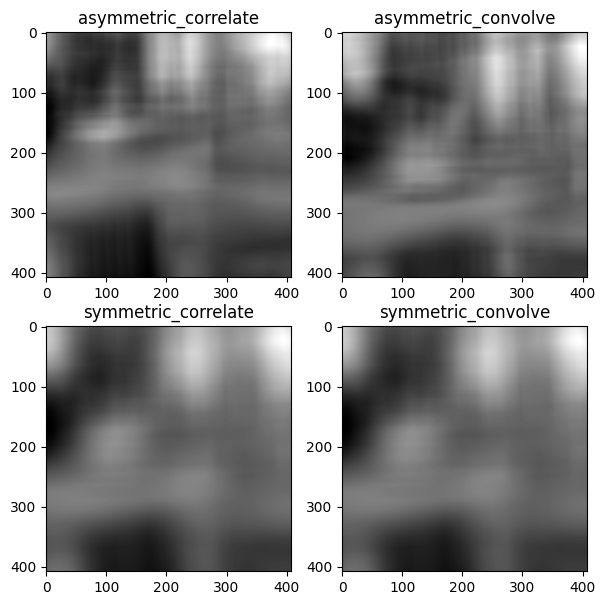

In [ ]:
# Display the images side by side (with proper labeling, which is which)
fig = plt.figure(figsize=(7, 7))
ax1=fig.add_subplot(2,2,1)
plt.title("asymmetric_correlate")
ax1.imshow((filtered_image_asymmetric1), cmap="gray")
ax2=fig.add_subplot(2,2,2)
plt.title("asymmetric_convolve")
ax2.imshow((filtered_image_asymmetric2), cmap="gray")
ax3=fig.add_subplot(2,2,3)
plt.title("symmetric_correlate")
ax3.imshow((filtered_image_symmetric1), cmap="gray")
ax4=fig.add_subplot(2,2,4)
plt.title("symmetric_convolve")
ax4.imshow((filtered_image_symmetric2), cmap="gray")

### **Answer to Task 1.1** <br>

### Write your answer here. Compare the outputs.

<hr>
When we choose correlation and convolve for a symmetric kernel, nothing changes because the kernel is the same after convolve. but if they aren't the same, the result changes.
<hr>

Now, to *convolve* an ```image``` with a ```kernel``` all we need to do is call the ```signal.convolve``` function from the ```scipy``` library.

```
filtered_image = signal.convolve(image, kernel, mode='same', method='auto')```

The parameters work the same way as the ```signal.correlate```function.

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


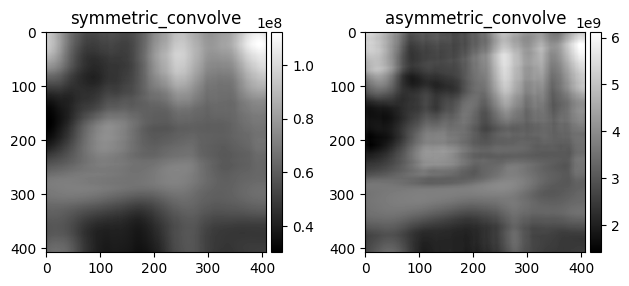

In [ ]:
# Filter the image with the asymmetric kernel using the convolution function
plt.subplot(1,2,1)
plt.title("symmetric_convolve")
io.imshow((filtered_image_symmetric2), cmap="gray")
plt.subplot(1,2,2)
plt.title("asymmetric_convolve")
io.imshow((filtered_image_asymmetric2), cmap="gray")

### **Answer to Task 1.2** <br>

### Write your answer here. Compare the outputs.
<hr>
When both images are convolved by a symmetric kernel and an asymmetric kernel, we get different results with only small changes to the pictures.
<hr>

## **Task 2: Edge Pair Detector** <br>
### Try to come up with two 3 x 3 filter kernels which are able to detect ***only the parallel pair of edges*** in the following image<br>

![](https://drive.google.com/uc?export=view&id=1a1CXbuC8A2FbyFvZovJMXERUijpatecU)

[The image can be downloaded from here: https://drive.google.com/file/d/1a1CXbuC8A2FbyFvZovJMXERUijpatecU/view?usp=sharing]

*Hint: No mathematical derivation is necessary. Just try devising the kernels using the same intuitions used behind the horizontal and vertical edge detector kernels. Coming up with a filter kernel means to determine the 9 filter coefficients of the 3x3 filer kernel.*

(626, 626, 3)

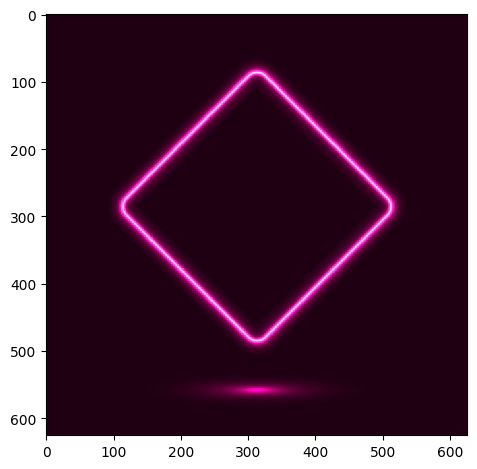

In [ ]:
# Download the image from the drive link above and upload it to your current working directory in colab. Then load the image

image = imread('diamond2.jpg') # TO-BE-COMPLETED
io.imshow(image)
image.shape

In [ ]:
# define the 2 custom kernels by replacing the "?"s with your values and uncomment the next few lines of code in this cell

kernel_1 = np.array([[1, 1, 0],
                      [1, 0, -1],
                     [0, -1, -1]])

kernel_2 = np.array([[0, 1, 1],
                     [-1, 0, 1],
                     [-1, -1, 0]])

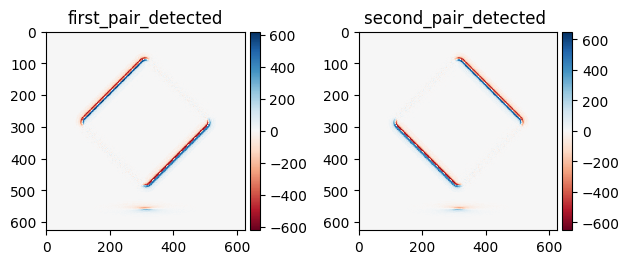

In [ ]:
# detect the 2 parallel pair of edges and plot them side by side in a 1x2 grid subplot

# detect the first pair using image filtering with kernel_1

first_pair_detected1 = signal.correlate(image[:,:,0], kernel_1, mode='same', method='auto')
first_pair_detected2 = signal.correlate(image[:,:,1], kernel_1, mode='same', method='auto')
first_pair_detected3 = signal.correlate(image[:,:,2], kernel_1, mode='same', method='auto')
first_pair_detected=first_pair_detected1+first_pair_detected2+first_pair_detected3
# detect the second pair using image filtering with kernel_2

second_pair_detected1 = signal.correlate(image[:,:,0], kernel_2, mode='same', method='auto')  # TO-BE-COMPLETED
second_pair_detected2 = signal.correlate(image[:,:,1], kernel_2, mode='same', method='auto')  # TO-BE-COMPLETED
second_pair_detected3 = signal.correlate(image[:,:,2], kernel_2, mode='same', method='auto')  # TO-BE-COMPLETED
second_pair_detected=second_pair_detected1+second_pair_detected2+second_pair_detected3
# plot the two filtered images side by side
plt.subplot(1,2,1)
plt.title("first_pair_detected")
io.imshow(first_pair_detected )
plt.subplot(1,2,2)
plt.title("second_pair_detected ")
io.imshow(second_pair_detected )

### **Answer to Task 2** <br>

### Write your answer here. Which filters you came up with and why? How did you choose the coefficients? Are your kernels unique or there can be other kernels which can accomplish the same task?
<hr>
the kernels:
<br>
[1, 1, 0],
[1, 0, -1],
[0, -1, -1]

[0, 1, 1],
[-1, 0, 1],
[-1, -1, 0]
<hr>
As we know, kernal looks for big changes in the area around an edge. As I chose a kernal, which has a value of 0 diagonally and 1 in the other half, I could use the picture intensity to find a big difference at the edge.
The second kernal has a diagonal edge, so we do the same thing for it. When the kernal is figuring out values and has an edge, it will find a big difference, a drop, or a high value.
<hr>
There can be other kernals without these. we just have to use math to make sure that the edge parts are very different.
<hr>

# Task 3: Sharpen with Edge Detectors <br>
### Try to come up with two 5 x 5 filter kernels which are able to detect and sharpen ***the vertical and horizontal edges*** of the windows and bricks<br>

<!-- ![](https://drive.google.com/file/d/15H_wiT-AMl88Hdrhc517yK4UbBJ1jbjw/view?usp=drive_link) -->

[The window+brick wall image can be downloaded from here: https://drive.google.com/file/d/15H_wiT-AMl88Hdrhc517yK4UbBJ1jbjw/view?usp=drive_link]

*Hint: For this task, visualize the 3x3 kernel into a bigger 5x5 one. Both will look almost the same, except for their size.*

(768, 768, 3)

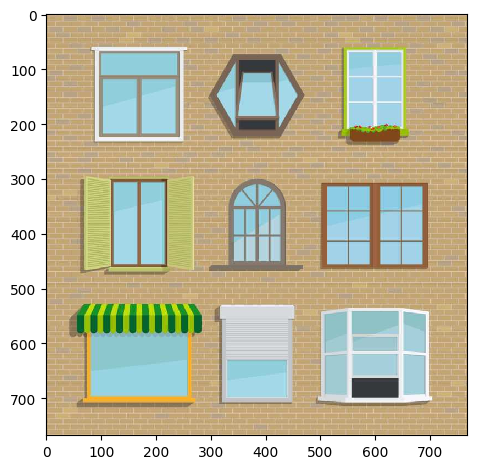

In [ ]:
# Download the image from the drive link above and upload it to your current working directory in colab. Then load the image

image = imread('House-Windows.png') # TO-BE-COMPLETED
io.imshow(image)
image.shape

In [ ]:
# define the 2 custom kernels by replacing the "?"s with your values and uncomment the next few lines of code in this cell

kernel_1 = np.array([ [1, 1, 0, -1, -1], # TO-BE-COMPLETED
                      [1, 1, 0, -1, -1], # TO-BE-COMPLETED
                      [1, 1, 0, -1, -1], # TO-BE-COMPLETED
                      [1, 1, 0, -1, -1], # TO-BE-COMPLETED
                      [1, 1, 0, -1, -1],]) # TO-BE-COMPLETED

kernel_2 = np.array([ [1, 1, 1, 1, 1], # TO-BE-COMPLETED
                      [1, 1, 1, 1, 1], # TO-BE-COMPLETED
                      [0, 0, 0, 0, 0], # TO-BE-COMPLETED
                      [-1, -1, -1, -1, -1], # TO-BE-COMPLETED
                      [-1, -1, -1, -1, -1],]) # TO-BE-COMPLETED

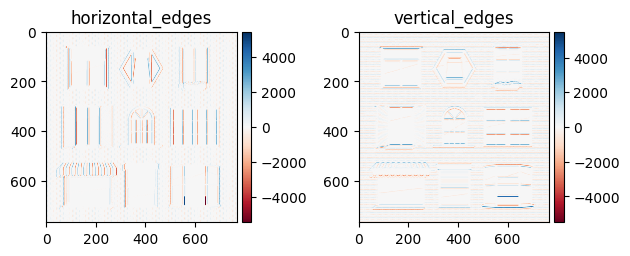

In [ ]:
# detect both types of the edges and plot them side by side in a 1x2 grid subplot

# detect the first pair using image filtering with kernel_1

# TO-BE-COMPLETED
horizontal_edges_detected1 = signal.correlate(image[:,:,0], kernel_1, mode='same', method='auto')
horizontal_edges_detected2 = signal.correlate(image[:,:,1], kernel_1, mode='same', method='auto')
horizontal_edges_detected3 = signal.correlate(image[:,:,2], kernel_1, mode='same', method='auto')
horizontal_edges_detected=horizontal_edges_detected1+horizontal_edges_detected2+horizontal_edges_detected3
# detect the second pair using image filtering with kernel_2
plt.subplot(1,2,1)
plt.title("horizontal_edges")
io.imshow(horizontal_edges_detected)

vertical_edges_detected1 = signal.correlate(image[:,:,0], kernel_2, mode='same', method='auto')
vertical_edges_detected2 = signal.correlate(image[:,:,1], kernel_2, mode='same', method='auto')
vertical_edges_detected3 = signal.correlate(image[:,:,2], kernel_2, mode='same', method='auto')
vertical_edges_detected=vertical_edges_detected1+vertical_edges_detected2+vertical_edges_detected3
# plot the two filtered images side by side
plt.subplot(1,2,2)
plt.title("vertical_edges")
io.imshow(vertical_edges_detected)


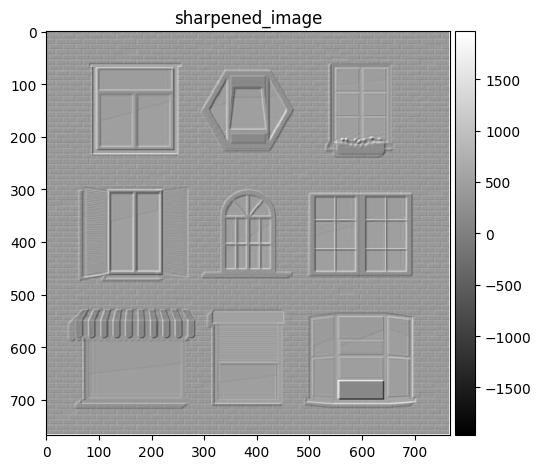

In [ ]:
# plot the sharpened image

main_img_intensity_fraction =   0.8      #
edge_horiz_intensity_fraction = 0.25     #
edge_vert_intensity_fraction =  0.25     # --> You can vary these 3 values to see what happens

# shapened image generation

sharpened_image =(main_img_intensity_fraction*image[:,:,0])+(edge_horiz_intensity_fraction*horizontal_edges_detected2)+(edge_vert_intensity_fraction*vertical_edges_detected2) #?+?+?#       # --> weighted sum of the image, horizontal edges & vertical edges
sharpened_image +=(main_img_intensity_fraction*image[:,:,1])+(edge_horiz_intensity_fraction*horizontal_edges_detected2)+(edge_vert_intensity_fraction*vertical_edges_detected2) #?+?+?#       # --> weighted sum of the image, horizontal edges & vertical edges
sharpened_image +=(main_img_intensity_fraction*image[:,:,2])+(edge_horiz_intensity_fraction*horizontal_edges_detected2)+(edge_vert_intensity_fraction*vertical_edges_detected2) #?+?+?#       # --> weighted sum of the image, horizontal edges & vertical edges
plt.title("sharpened_image")
io.imshow(sharpened_image,cmap="gray")
# plot the final output

# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED

### **Answer to Task 3** <br>

### Write your answer here. Which filters you came up with and why? How did you choose the coefficients? How does changing the fraction values affect the sharpening? Among the window and bricks, which ones become more prominent in the final output?
<hr>
kernels:
<br>
[ 1,  1,  0, -1, -1],
  [ 1,  1,  0, -1, -1],
  [ 1,  1,  0, -1, -1],
  [ 1,  1,  0, -1, -1],
  [ 1,  1,  0, -1, -1]

[ 1,  1,  1,  1,  1],
  [ 1,  1,  1,  1,  1],
  [ 0,  0,  0,  0,  0],
  [-1, -1, -1, -1, -1],
  [-1, -1, -1, -1, -1]
<hr>
The combination of positive and negative coefficients, as well as the central focus on differences, would likely emphasize both the edges of the window and the bricks. Edges might become more defined, and texture boundaries more pronounced.
<hr>
Even though the coefficient was changed, I didn't notice any difference. I can find the brick edge for both kernels after changing the efficiency.
<hr>

# Task 4: Noise Reduction/Denoising *(Unguided)*<br>
### Use 'gaussian_filter' from scipy.ndimage for this task to denoise two given images: <br> (i) A Noisy Image, (ii) Just Noise filled Image.<br>

<!-- ![](https://drive.google.com/file/d/15H_wiT-AMl88Hdrhc517yK4UbBJ1jbjw/view?usp=drive_link) -->

[(i) Noisy Image: https://drive.google.com/file/d/1I1ye90IggplNRVVtZfFTLXLqQWJNGbCM/view?usp=sharing <br>
 (ii) Just Noise: https://drive.google.com/file/d/13AMtZR8ZCGHVcsw7tOJBgSFDnDhgtL9b/view?usp=sharing]

### Tune the 'sigma' value to obtain different smoothening gaussian kernels. This will give you various degrees of denoising. For image (i), your task is to smoothen the image to get as low noise as possible. For image (ii), your task is to get an almost flat intensity image.

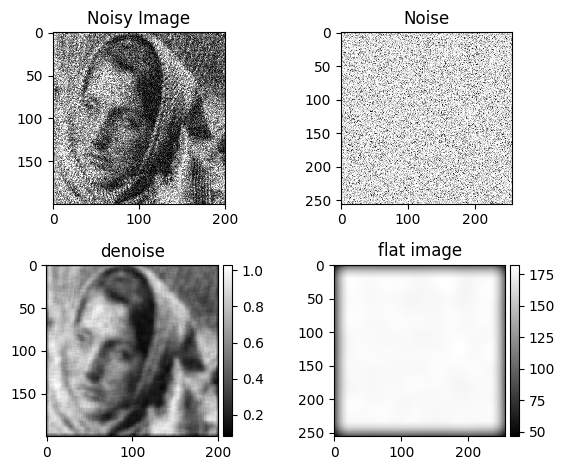

In [ ]:

# plt.subplot(2,3,1)
image1 = imread('Noisy Image.png') # TO-BE-COMPLETED
plt.subplot(2,2,1)
plt.title("Noisy Image")
io.imshow(image1,cmap='gray')


# plt.subplot(2,3,2)
image2 = imread('Noise.png') # TO-BE-COMPLETED
plt.subplot(2,2,2)
plt.title("Noise")
io.imshow(image2)

def gaussian2D(size, sigma):
  x = np.linspace(0, size, size)
  y = np.linspace(0, size, size)
  x1, y1 = np.meshgrid(x, y)
  z = np.exp(-((x1-size//2)**2+(y1-size//2)**2)/(2*(sigma**2)))
  z = z/((((2*np.pi)**0.5)*sigma)**2)

  return z
krnl = gaussian2D(7,40)
n= signal.correlate(image1, krnl, mode='same', method='auto')
plt.subplot(2,2,3)
plt.title("denoise")
io.imshow(n,cmap='gray')

krnl2 = gaussian2D(45, 12)

n= signal.correlate(image2[:,:,0], krnl2, mode='same', method='auto')

plt.subplot(2,2,4)
plt.title("flat image")
io.imshow(n,cmap='gray')


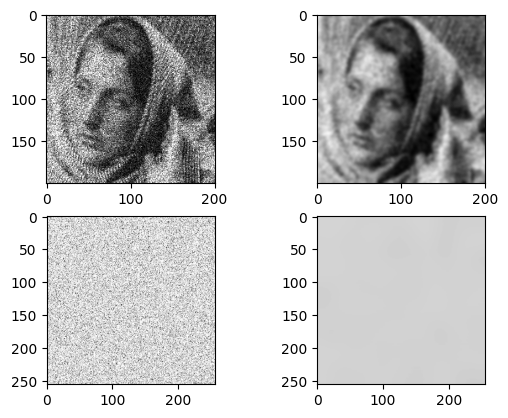

In [ ]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt


smoothed_image = ndimage.gaussian_filter(image1, 1.8)

# Visualize the results
plt.subplot(2, 2, 1)
plt.imshow(image1, cmap='gray')


plt.subplot(2, 2, 2)
plt.imshow(smoothed_image, cmap='gray')


smoothed_image1 = ndimage.gaussian_filter(image2, 15)

# Visualize the results
plt.subplot(2, 2, 3)
plt.imshow(image2, cmap='gray')


plt.subplot(2, 2, 4)
plt.imshow(smoothed_image1, cmap='gray')

plt.show()


### **Answer to Task 4** <br>

### Write your answer here. Subjectively speaking, how much 'sigma' value for each image was good enough for denosing in your opinion? How do too high (8,12,15 etc.) or too low (0.1, 0.01 etc.) 'sigma' values influence the images?
<hr>
For noisy image = <b>1.8</b> <br>
For noise = <b>15</b> <br>
<hr>
for a high sigma noise number.Since our main goal was to get rid of the black salt, png might work best. But if the image is noisy, we won't get a good result because the high sigma will smooth out the features of the women, but the picture won't be clear enough to see.

On the other hand, we can see different things when the number is low, like 0.1 or 0.01. When some noise is taken out of the shot of the woman, it doesn't change much. but noise.png stays mostly the same. You can't see a big difference between before and after.
<hr>

## **The END**